# Phishing Detection using NLP

# Import necessary libraries

In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import create_optimizer

# Data Collection & Loading

In [ ]:
# Load dataset (CSV, JSON, or API)
df = pd.read_csv("CEAS_08.csv")
# Preview data
df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


# Data Preprocessing

In [13]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning
df['clean_text'] = df['body'].apply(clean_text)

# Tokenization, stopword removal, lemmatization
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess)

In [14]:
df.head()

,sender,receiver,date,subject,body,label,urls,clean_text,processed_text
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,buck up your troubles caused by small dimensio...,buck trouble caused small dimension soon becom...
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,upgrade your sex and pleasures with these tech...,upgrade sex pleasure technique
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,the daily top 10 from cnn com top videos and s...,daily top 10 cnn com top video story aug 1 200...
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,would anyone object to removing so from this l...,would anyone object removing list tld basicall...
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,welcomefastshippingcustomersupport,welcomefastshippingcustomersupport


# Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text']).toarray()

y = df['label']

# Train-Test Split)


In [17]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Traditional ML)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs = -1),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs = -1),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Linear SVM": LinearSVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs = -1),
    "LightGBM": LGBMClassifier(n_jobs = -1)
}
results = {}

# Train and evaluate all models
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))
    results[name] = accuracy_score(y_test, y_pred)


=== Multinomial Naive Bayes ===
Accuracy: 0.9715234325118121
              precision    recall  f1-score   support

  Legitimate       0.94      1.00      0.97      3490
    Phishing       1.00      0.95      0.97      4341

    accuracy                           0.97      7831
   macro avg       0.97      0.97      0.97      7831
weighted avg       0.97      0.97      0.97      7831


=== Logistic Regression ===
Accuracy: 0.9905503767079555
              precision    recall  f1-score   support

  Legitimate       0.99      0.98      0.99      3490
    Phishing       0.99      1.00      0.99      4341

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99      7831


=== Random Forest ===
Accuracy: 0.9901672838717916
              precision    recall  f1-score   support

  Legitimate       0.99      0.99      0.99      3490
    Phishing       0.99      0.99      0.99      4341

    accura

# Model Evaluation

[LightGBM] [Info] Number of positive: 17501, number of negative: 13822
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.318124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401779
[LightGBM] [Info] Number of data points in the train set: 31323, number of used features: 4895
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558727 -> initscore=0.235996
[LightGBM] [Info] Start training from score 0.235996


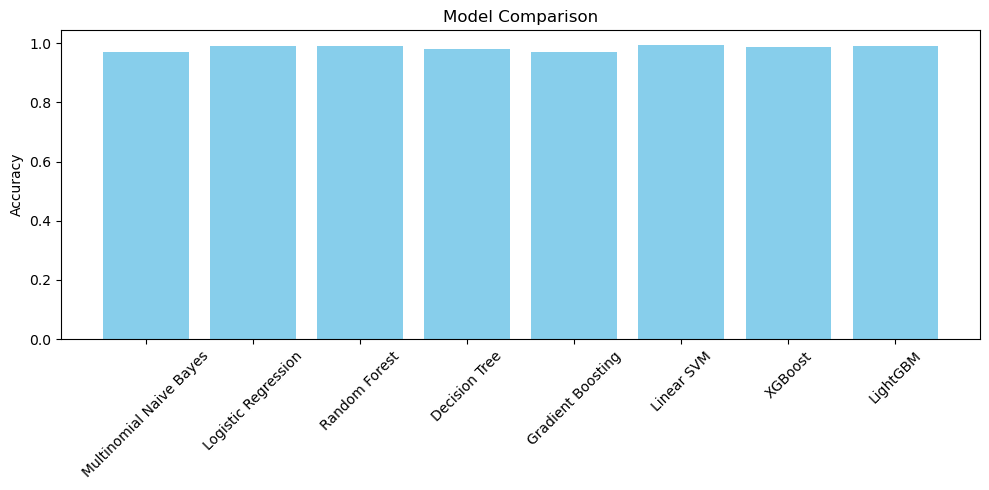

In [25]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Comparison')
plt.tight_layout()
plt.show()

# Deep Learning

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Create a neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"]))

Epoch 1/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9499 - loss: 0.1659 - val_accuracy: 0.9938 - val_loss: 0.0223
Epoch 2/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9935 - val_loss: 0.0231
Epoch 3/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9943 - val_loss: 0.0256
Epoch 4/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9944 - val_loss: 0.0281
Epoch 5/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 1.0000 - loss: 4.1357e-04 - val_accuracy: 0.9944 - val_loss: 0.0300
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

  Legitimate       0.99      0.99      0.99      3490
    Phishing       0.99      0.99      0.99      4341

    accuracy                           0.99      7831
   macro avg       0.99      0.99      0.99      7831
weighted avg       0.99      0.99      0.99     

# LSTM

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000
maxlen = 100

# Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_text'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['processed_text'])

# Padding
X = pad_sequences(sequences, maxlen=maxlen, padding='post')
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.8621 - loss: 0.3655 - val_accuracy: 0.9837 - val_loss: 0.0786
Epoch 2/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.9826 - loss: 0.0735 - val_accuracy: 0.9901 - val_loss: 0.0395
Epoch 3/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.9915 - loss: 0.0344 - val_accuracy: 0.9906 - val_loss: 0.0327
Epoch 4/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.9963 - loss: 0.0197 - val_accuracy: 0.9912 - val_loss: 0.0308
Epoch 5/5
784/784 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.9975 - loss: 0.0167 - val_accuracy: 0.9946 - val_loss: 0.0342


In [44]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9932 - loss: 0.0421
Test Accuracy: 0.9929766058921814


In [46]:
def predict_lstm(text):
    text_seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(text_seq, maxlen=maxlen, padding='post')
    pred = model.predict(padded)[0][0]
    return 'Phishing' if pred >= 0.5 else 'Legitimate'

# Example
print(predict_lstm("You have won $10,000! Click here to claim."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Phishing


In [48]:
predict_lstm("Hi Carla, How are you? Everything is fine here, just wanted to let you know My daughter graduated last week.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


'Legitimate'

In [50]:
predict_lstm("Once you click the following link, you will get a reward of 1000$ for the first time.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'Phishing'